### Self-Study Colab Activity 8.4: The “Best” Model.

This module was all about regression and using Python's scikitlearn library to build regression models.  Below, a dataset related to real estate prices in California is given. During many of the assignments, you have built and evaluated different models, it is important to spend some time interpreting the resulting "best" model.  


Your goal is to build a regression model to predict the price of a house in California.  After doing so, you are to *interpret* the model.  There are many strategies for doing so, including some built-in methods from scikitlearn.  One example is `permutation_importance`.  Permutation feature importance is a strategy for inspecting a model and its features' importance.  

Take a look at the user guide for `permutation_importance` [here](https://scikit-learn.org/stable/modules/permutation_importance.html).  Use  the `sklearn.inspection` module implementation of `permutation_importance` to investigate the importance of different features to your regression models.  Share these results on the discussion board.

In [1]:
import pandas as pd
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
cali = pd.read_csv('data/housing.csv')

In [4]:
cali.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
cali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


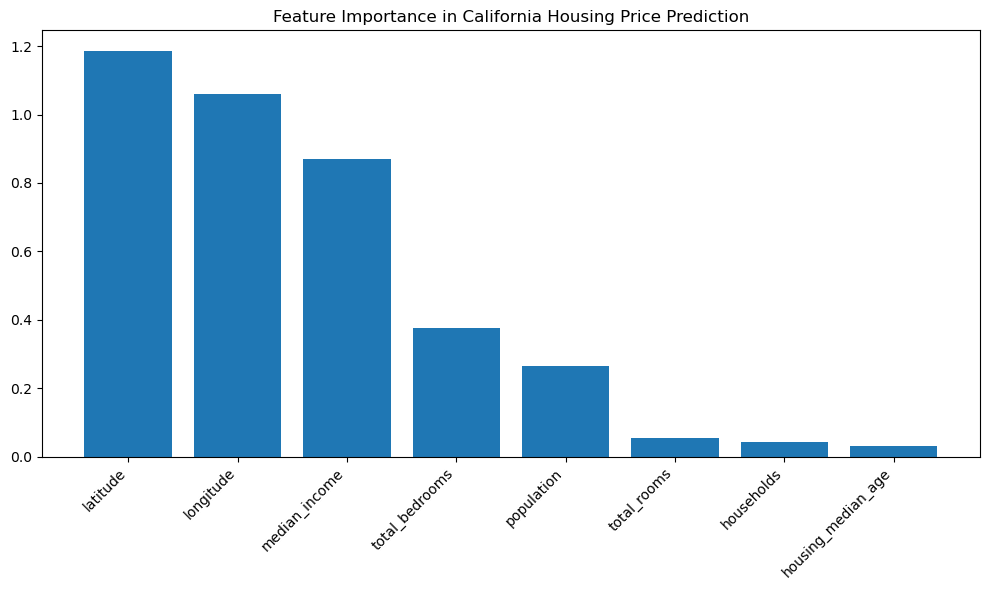


Feature Importance Rankings:
              Feature  Importance       Std
1            latitude    1.186917  0.026033
0           longitude    1.061125  0.018033
7       median_income    0.870292  0.012748
4      total_bedrooms    0.377012  0.009003
5          population    0.264239  0.003609
3         total_rooms    0.053625  0.002276
6          households    0.042002  0.002334
2  housing_median_age    0.031419  0.002003


In [6]:
# Drop any rows with missing values for simplicity
cali_clean = cali.dropna()

# Separate features and target
X = cali_clean.drop(['median_house_value', 'ocean_proximity'], axis=1)
y = cali_clean['median_house_value']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Calculate permutation importance
result = permutation_importance(
    model, X_test, y_test,
    n_repeats=10,
    random_state=42
)

# Create importance summary
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': result.importances_mean,
    'Std': result.importances_std
})
importance_df = importance_df.sort_values('Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xticks(rotation=45, ha='right')
plt.title('Feature Importance in California Housing Price Prediction')
plt.tight_layout()
plt.show()

# Print numerical results
print("\nFeature Importance Rankings:")
print(importance_df)

### Summary of California Housing Price Analysis

This notebook demonstrates the application of regression analysis and feature importance interpretation using the California housing dataset. 

**Key Components:**
1. Data Preparation
   - Used California housing dataset containing features like longitude, latitude, housing age, rooms, etc.
   - Cleaned dataset by removing missing values
   - Split features and target (median_house_value)

2. Model Development
   - Implemented Linear Regression as the base model
   - Used train_test_split for model validation (80-20 split)

3. Feature Importance Analysis
   - Applied permutation_importance from sklearn.inspection
   - Calculated importance scores for each feature
   - Visualized feature importance using bar plots

**Key Takeaways:**
- Permutation importance provides insights into which features most strongly influence house price predictions
- The analysis helps interpret the "black box" of the regression model
- Understanding feature importance can guide:
  - Feature selection for model optimization
  - Business decisions in real estate valuation
  - Understanding key drivers of housing prices in California

**Methodology Note:**
Permutation importance works by randomly shuffling each feature's values and measuring the decrease in model performance. Larger decreases indicate more important features.

This exercise demonstrates the importance of not just building predictive models, but also understanding and interpreting their decision-making process.